In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [13]:
train_dir="AI_detection_data/train"
test_dir="AI_detection_data/test"
lst=["AI_detection_data/train/REAL","AI_detection_data/train/FAKE","AI_detection_data/test/REAL","AI_detection_data/test/FAKE"]

 image: 50000


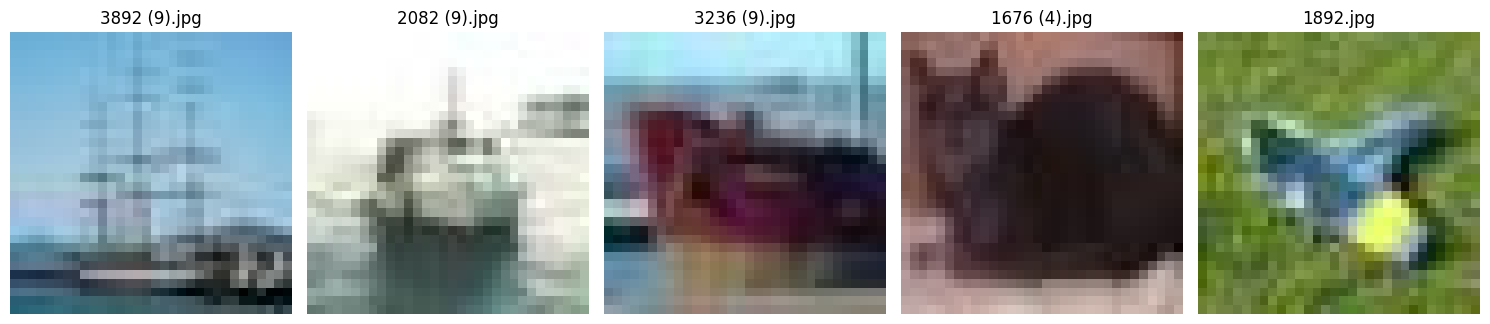

 image: 50000


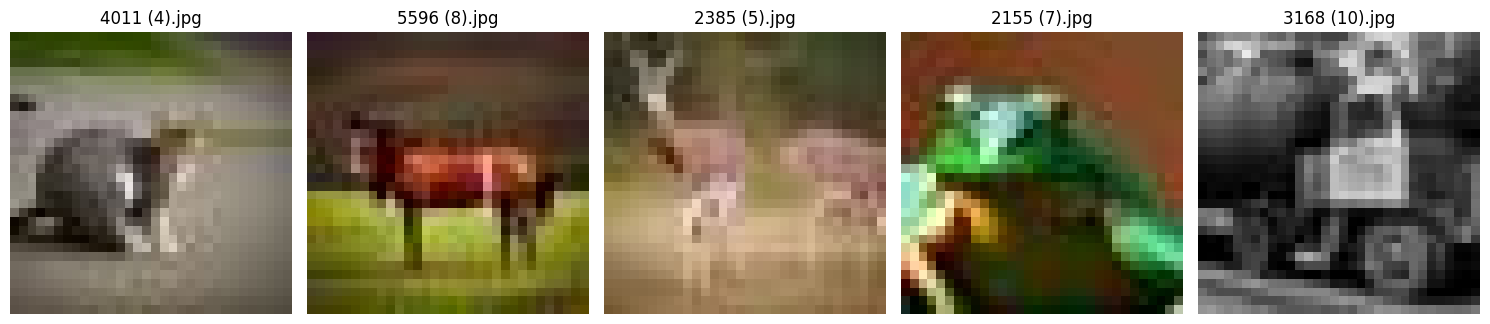

 image: 10000


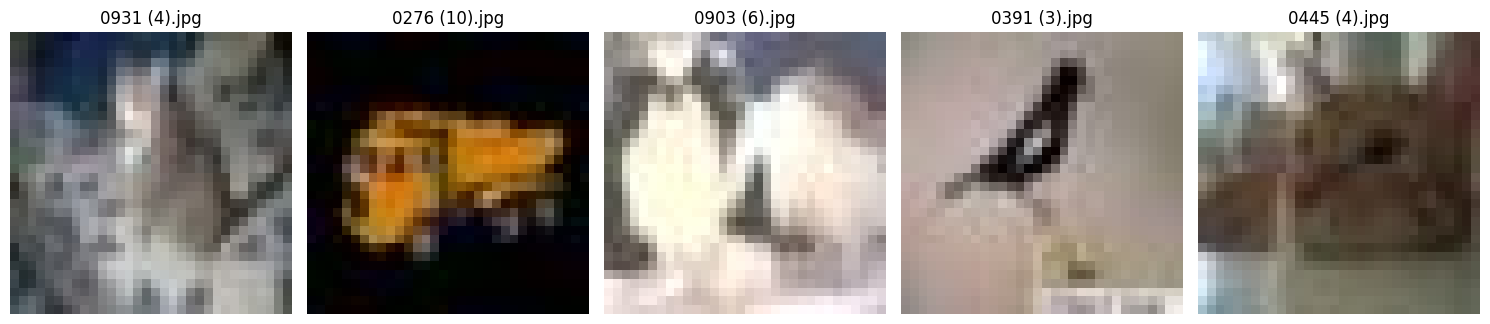

 image: 10000


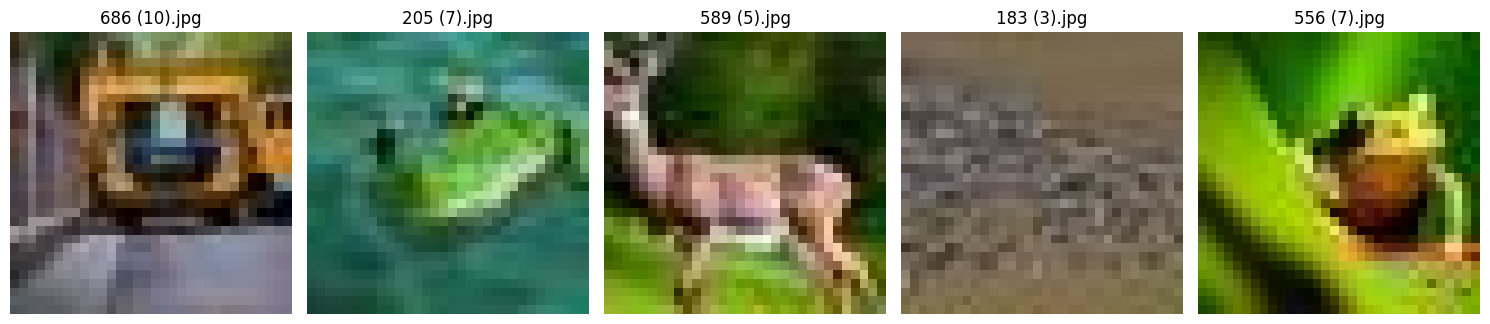

In [ ]:

valid = ('.jpg', '.jpeg', '.png')

for i in lst:
  all_img = [file for file in os.listdir(i) if file.lower().endswith(valid)]

  print(f" image: {len(all_img)}")
  num_img = 5
  ran_img = random.sample(all_img, num_img)
  plt.figure(figsize=(15, 5))

  for idx, name in enumerate(ran_img):
      img_path = os.path.join(i, name)
      img = Image.open(img_path)

      plt.subplot(1, num_img, idx + 1)
      plt.imshow(img)
      plt.title(name)
      plt.axis('off')

  plt.tight_layout()
  plt.show()


In [15]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)


In [16]:
print(train_data.classes)
print(train_data.class_to_idx)

['FAKE', 'REAL']
{'FAKE': 0, 'REAL': 1}


In [17]:
print(test_data.classes)
print(test_data.class_to_idx)

['FAKE', 'REAL']
{'FAKE': 0, 'REAL': 1}


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, len(train_data.classes))

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

In [23]:
device

device(type='cuda')

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 1
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/1, Loss: 0.2942


In [28]:
model

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [39]:
model.eval()
correct = 0
total = 0
count0=0
count1=0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        pred = model(images)
        predicted = torch.max(pred, 1)[1]
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        count0 += (predicted == 0).sum().item()
        count1 += (predicted == 1).sum().item()

acc = 100 * correct / total
print(f"Test Accuracy: {acc:.2f}%")


Test Accuracy: 91.62%


In [40]:
count0

9752

In [41]:
count1

10248

In [31]:
torch.save(model.state_dict(), 'model_1.pth')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.96862745..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.30196083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.94509804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.3803922].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].
Clipping input data to 

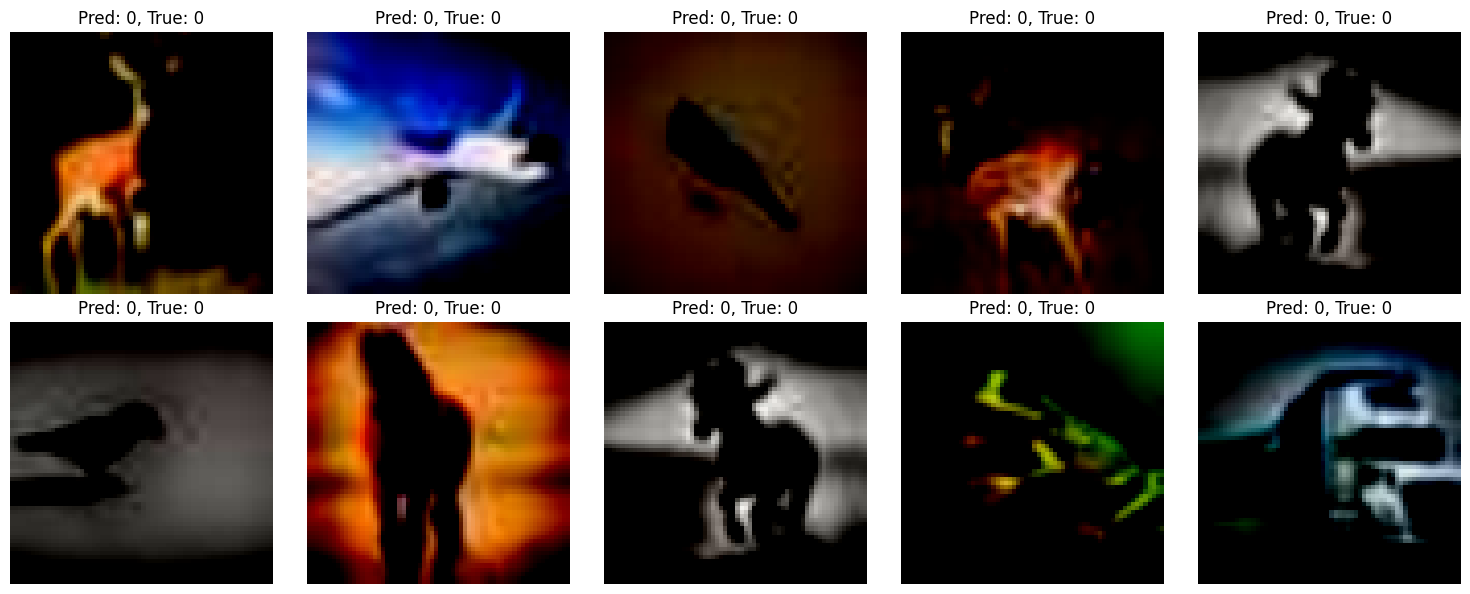

In [ ]:
model.eval()
num_images = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6)) 
axes = axes.flatten()  
for i in range(num_images):
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    random_idx = random.randint(0, len(images) - 1)
    
    image = images[random_idx]
    true_label = labels[random_idx]
    
    image = image.unsqueeze(0).to(device) 
    output = model(image)
    predicted = torch.max(output, 1)[1]
    image = image.squeeze().cpu().numpy().transpose((1, 2, 0)) 

    axes[i].imshow(image)
    axes[i].set_title(f"Pred: {predicted.item()}, True: {true_label.item()}")
    axes[i].axis('off') 

plt.tight_layout()
plt.show()
